# Plots for Drone Trajectory Planning Chapter

## Introduction

This Jupyter notebook focuses on optimizing drone flight paths using the multisegment collocation method. Emphasis is placed on generating precise and informative visualizations that clearly depict various aspects of drone trajectory planning. These visualizations include the drone's paths in the presence of obstacles, sample trajectory profiles, iterative optimization processes, and identification of errors and constraint violations.

## Objectives

- To optimize drone flight paths using the multisegment collocation method.
- To visualize drone paths and obstacles, sample trajectories, and iterative optimization results.
- To identify and graphically represent errors and constraint violations in trajectory planning.
- To export these visualizations directly into a PDF format for comprehensive reporting.

## Tools and Libraries

- **Python**: For programming and algorithm implementation.
- **Pandas**: For handling and analyzing data sets.
- **Matplotlib**: Our primary tool for creating various types of plots and visualizations.
- **Matplotlib** PDF Backend: For exporting all visualizations directly to a PDF file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from run_traj_search import load_world_path_and_scale
from drone_params import Drone
from worlds import Tree, Gridmap, generate_some_worlds, generate_worlds
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib
import os

[WARNING] dimension is unknown


In [2]:
# set path to results
current_folder = os.getcwd()
results_dir = "results"
data_dir = "data"
eval_dir = "eval"
init_dir = "inits"
traj_dir = "trajs"
plot_dir = "plots"

full_path_traj = os.path.join(current_folder, results_dir, data_dir, traj_dir)
full_path_plot = os.path.join(current_folder, results_dir, plot_dir)
pickle_files_traj = os.listdir(full_path_traj)

# Plot params

In [3]:
# matplotlib.rcParams['font.family'] = 'Bookman Old Style'  # Replace with the name of a similar font available on your system
# Enable LaTeX and set the font to TeX Gyre Bonum
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{tgbonum}'
figsize = (6, 4)
dpi = 600
print_plots = True
if print_plots:
    os.makedirs(full_path_plot, exist_ok=True)

# Load world and path

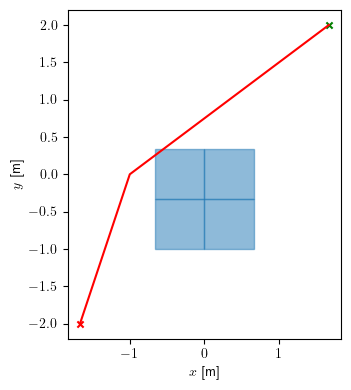

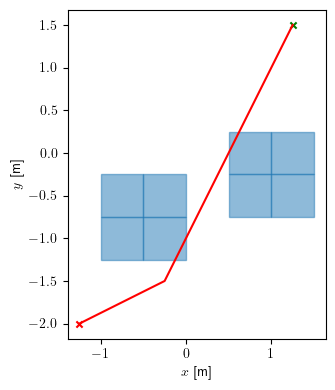

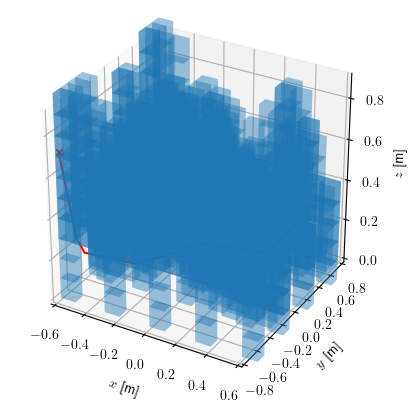

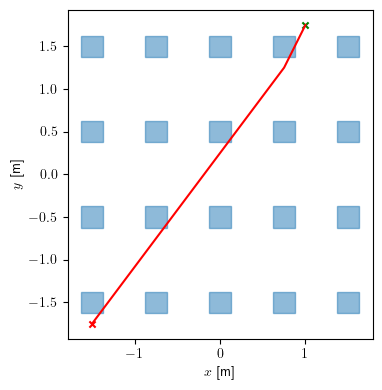

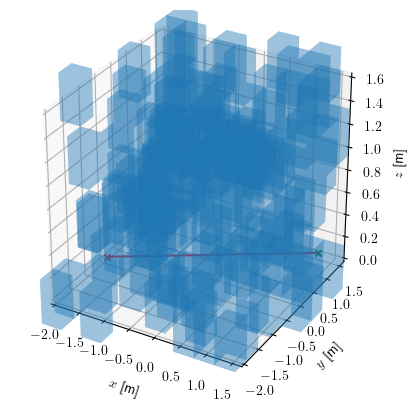

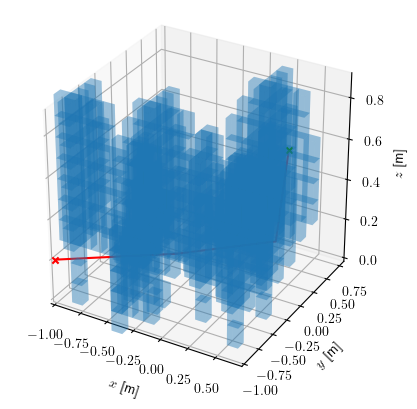

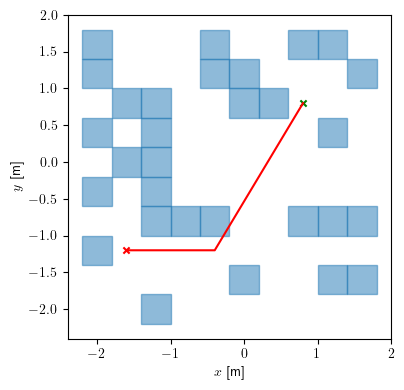

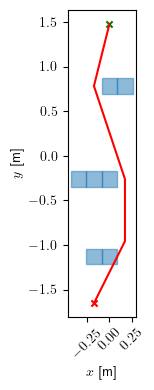

In [4]:
drone = Drone()
worlds = ["simple", "simple2", "orchard", "columns", "random_spheres",
          "forest", "random_columns", "walls"]
worlds_results = ["simple", "simple2","orchard",  "columns", "random_spheres", "random_columns", "forest",
          "walls"]
for world_name in worlds:
    world, path = load_world_path_and_scale(world_name, current_folder = '', drone = drone)
    world.plot(figsize)
    if path.shape[1] == 2:
        plt.plot(path[:, 0], path[:, 1], 'r')
    else:
        plt.plot(path[:, 0], path[:, 1], path[:, 2], 'r')
    if world_name == 'walls':
        plt.xticks(rotation=45)
    if print_plots:
        plt.tight_layout()
        plt.savefig(os.path.join(full_path_plot, f"path_{world_name}.png"), dpi=dpi, bbox_inches="tight")
plt.show()

# Load trajectories

In [5]:
import numpy as np
import cloudpickle as cp
import pandas as pd
from ps_solution import PsSolution
import csv
import os
import re
import ast

In [6]:
# describe patterns
worlds = ["simple", "simple2", "orchard", "columns", "random_spheres",
          "forest", "random_columns", "walls"]
init_levels = ["none", "position", "speed", "orientation", "angular_rate"]
world_pattern = r"|".join(re.escape(w) for w in worlds)
init_pattern = r"|".join(re.escape(w) for w in init_levels)
pattern = re.compile(
    r"ps_sol_(?P<name>" + world_pattern + r")_"       # Match world name group 
    r"(?P<bound>bound(on|off))_"
    r"(?P<const>const(on|off))_"
    r"(?P<init_level>""" + init_pattern + r")_"
    r"(?P<ctrl>ctrl(on|off))_"
    r"(?P<init_domain>(isingle|imulty))_"
    r"(?P<seg>(single|multi))_"
    r"(?P<approx>\w+).pkl"
)

In [7]:
data = []
for f in pickle_files_traj:
    # go through each file with evaluation of trajectory and planning procedure
    match = pattern.search(f)
    if match:
        # patterns found
        groups = match.groupdict()
        name = groups["name"]
        init_level = groups["init_level"]
        bound = groups["bound"]
        const = groups["const"] 
        ctrl = groups["ctrl"]
        init_domain = groups["init_domain"]
        seg = groups["seg"]
        approx = groups["approx"]
        
        # if len(data) == 0:
        #     data_head = ["World", "Init. Level", "Boundary", "Constraints", "Control", "Init. Domain", "Domain", "Approximation", "Filename", "File"]
        with open(os.path.join(full_path_traj,f), mode='rb') as file:
            sol = cp.load(file)
            
         # Extract attributes from sol based on groups
        sol_data = {key: getattr(sol, groups[key], None) for key in groups}

        # Append the data with additional information from sol
        data.append({
            'name': groups["name"],
            'init_level': groups["init_level"],
            'bound': groups["bound"],
            'const': groups["const"],
            'ctrl': groups["ctrl"],
            'init_domain': groups["init_domain"],
            'seg': groups["seg"],
            'approx': groups["approx"],
            'filename': f,
            'solution_object': sol  # Storing the PsSolution object directly
        })
        # data.append([name, init_level, bound, const, ctrl, init_domain, seg, approx, f]+[sol])
df_traj = pd.DataFrame(data)

df_traj = df_traj.loc[~((df_traj['init_level']=='none') & (df_traj['const'] == 'conston'))]

## Extract Solution, Load Path and Print Plots

ps_sol_simple_boundoff_constoff_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


<Figure size 600x400 with 0 Axes>

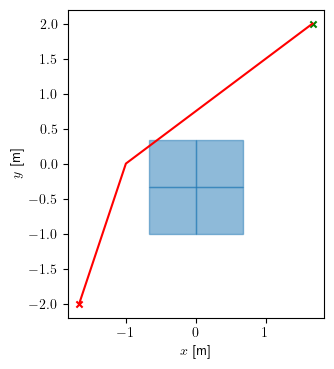

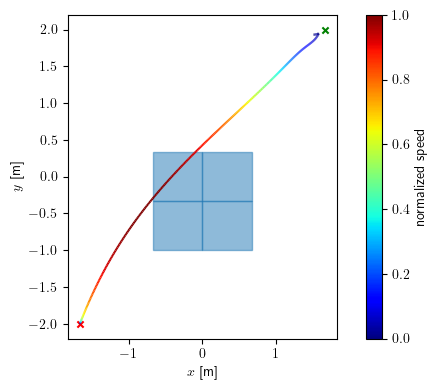

ps_sol_simple_boundoff_constoff_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


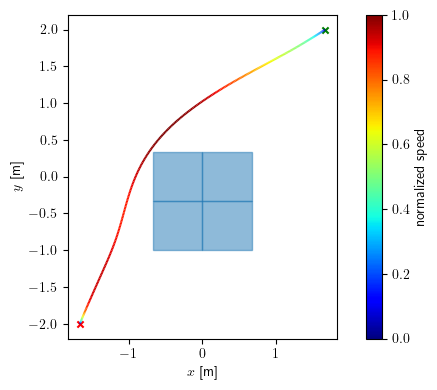

ps_sol_simple_boundon_conston_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


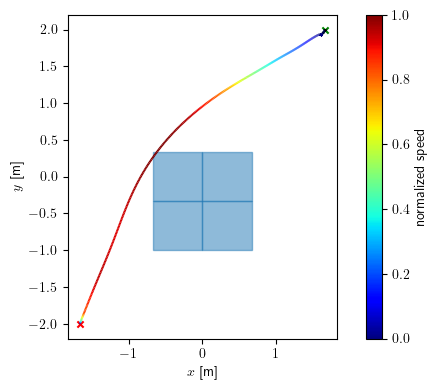

ps_sol_simple_boundon_conston_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


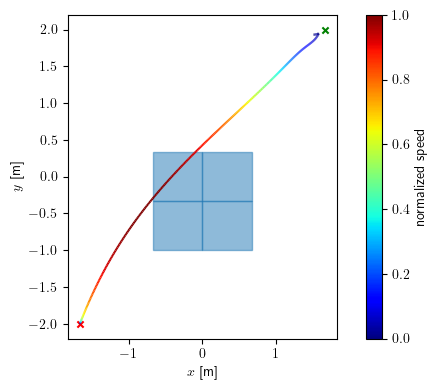

ps_sol_simple_boundon_conston_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


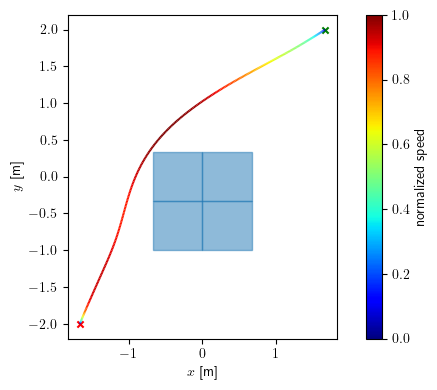

ps_sol_simple_boundoff_constoff_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


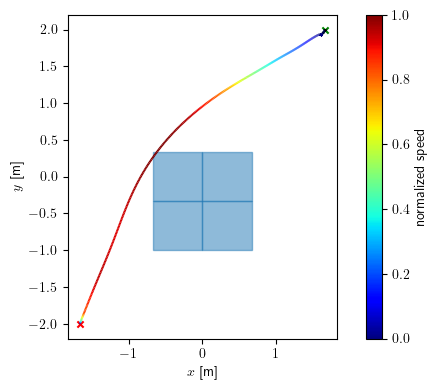

ps_sol_simple_boundon_conston_speed_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


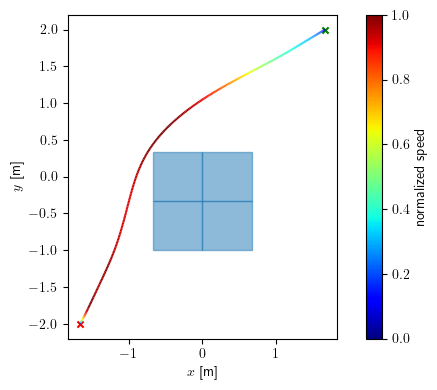

ps_sol_simple_boundon_conston_speed_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


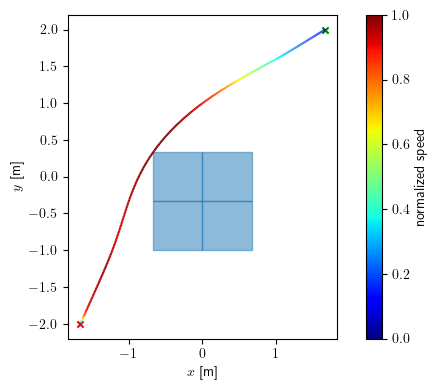

ps_sol_simple_boundon_conston_speed_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


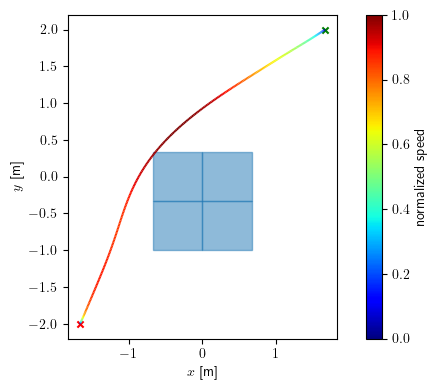

ps_sol_simple_boundon_conston_orientation_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


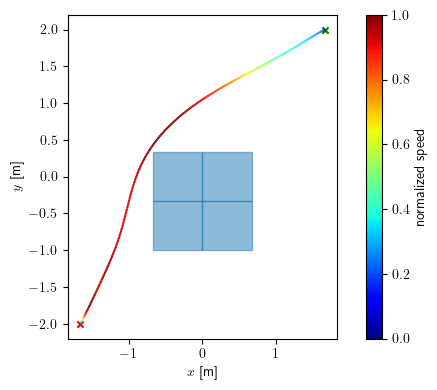

ps_sol_simple_boundon_conston_orientation_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


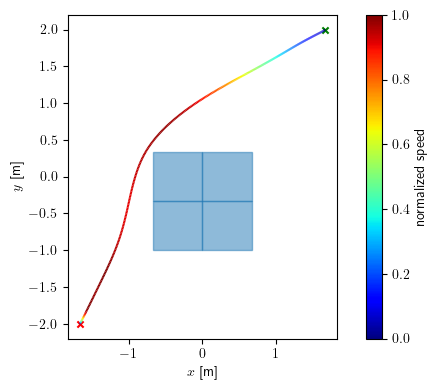

ps_sol_simple_boundon_conston_orientation_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


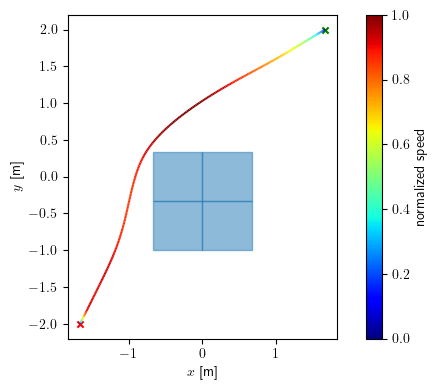

ps_sol_simple_boundon_conston_angular_rate_ctrlon_isingle_multi_chebyshev_with_warmstart.pkl


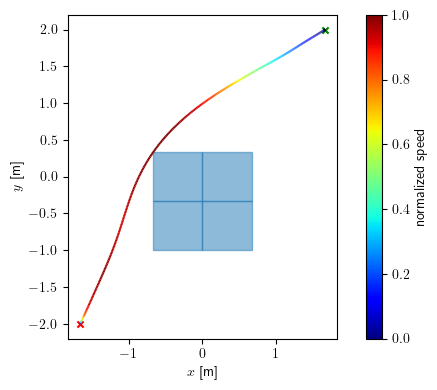

ps_sol_simple_boundon_conston_angular_rate_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


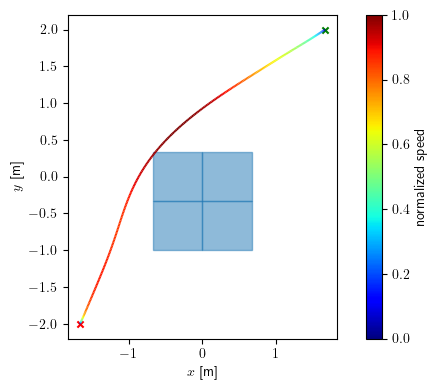

ps_sol_simple_boundon_conston_angular_rate_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


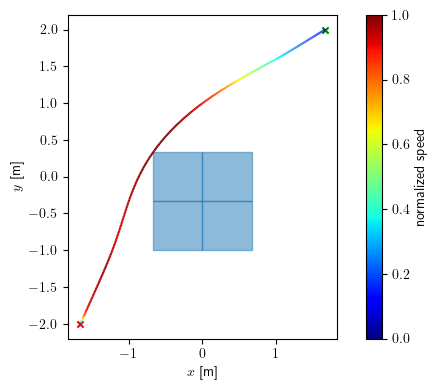

ps_sol_simple_boundon_conston_angular_rate_ctrlon_isingle_single_chebyshev_with_warmstart.pkl


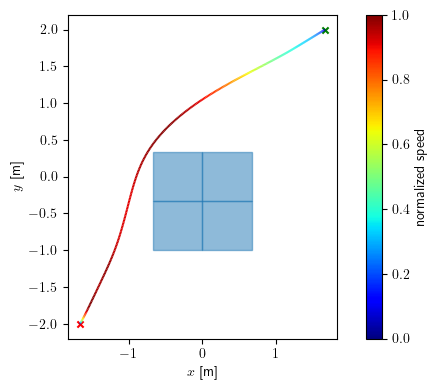

ps_sol_simple_boundon_conston_angular_rate_ctrlon_imulty_multi_chebyshev_with_warmstart.pkl


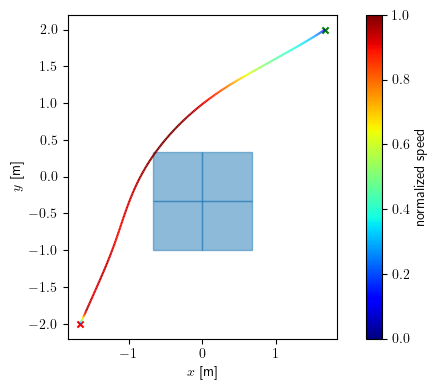

ps_sol_simple_boundon_conston_angular_rate_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


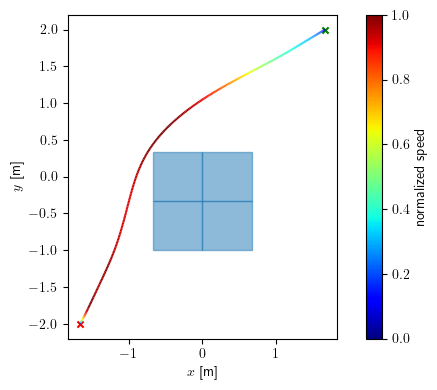

ps_sol_simple2_boundon_conston_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


<Figure size 600x400 with 0 Axes>

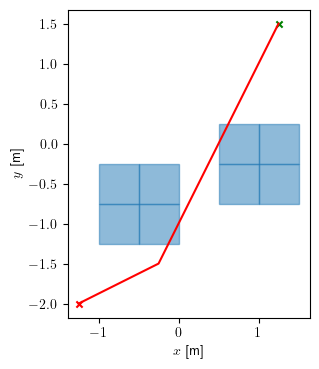

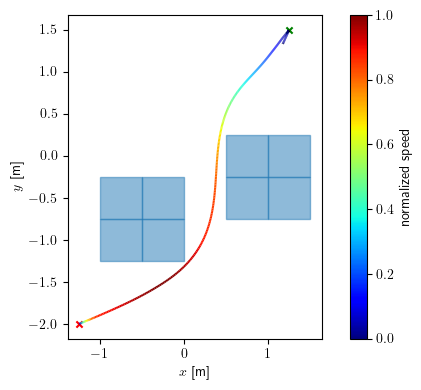

ps_sol_simple2_boundoff_constoff_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


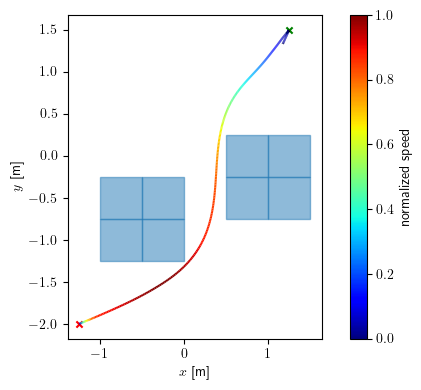

ps_sol_simple2_boundon_conston_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


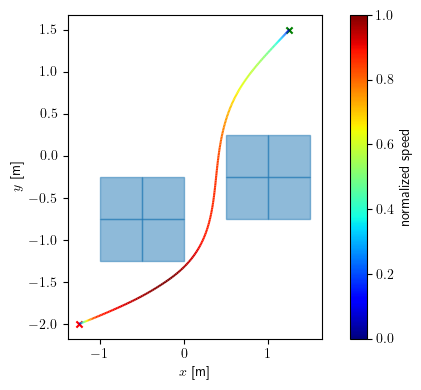

ps_sol_simple2_boundon_conston_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


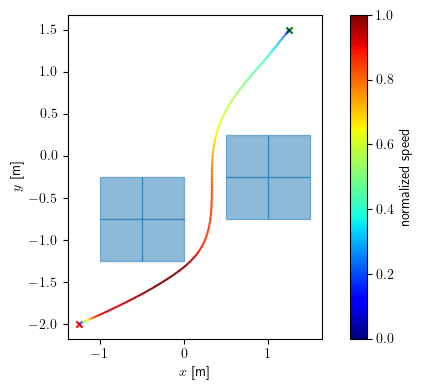

ps_sol_simple2_boundoff_constoff_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


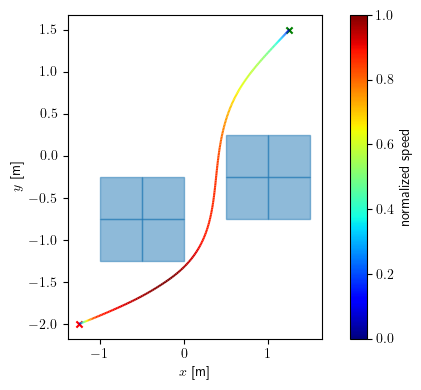

ps_sol_simple2_boundoff_constoff_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


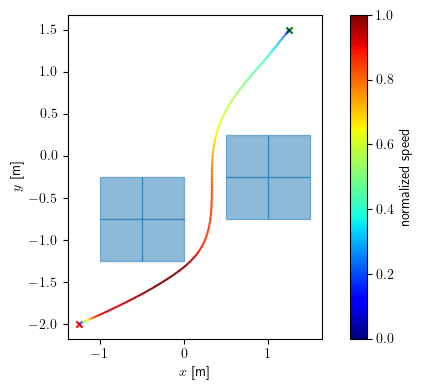

ps_sol_simple2_boundon_conston_speed_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


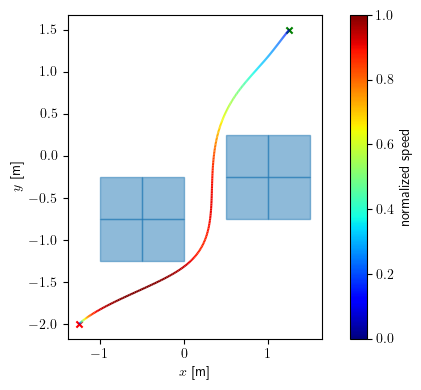

ps_sol_simple2_boundon_conston_speed_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


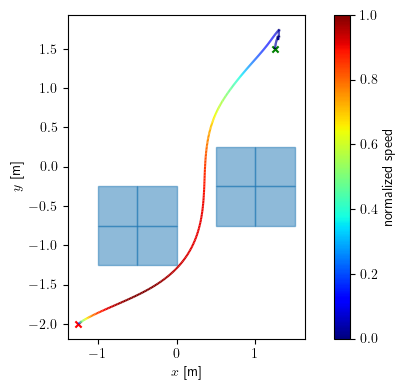

ps_sol_simple2_boundon_conston_speed_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


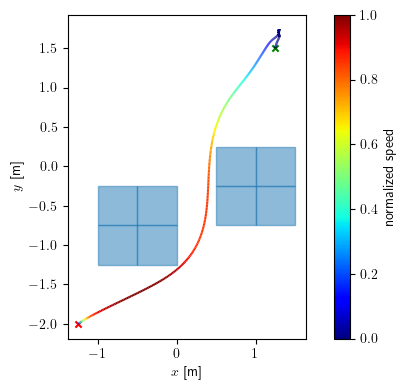

ps_sol_simple2_boundon_conston_orientation_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


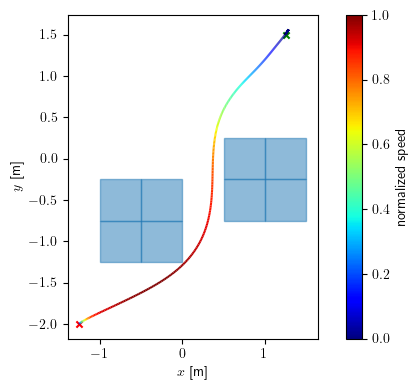

ps_sol_simple2_boundon_conston_orientation_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


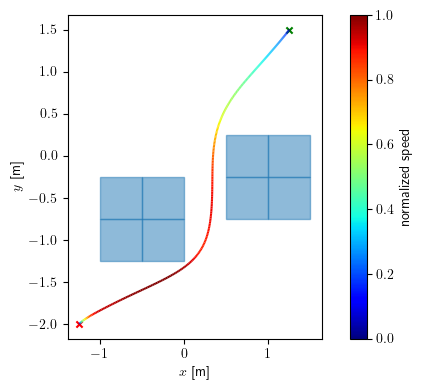

ps_sol_simple2_boundon_conston_orientation_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


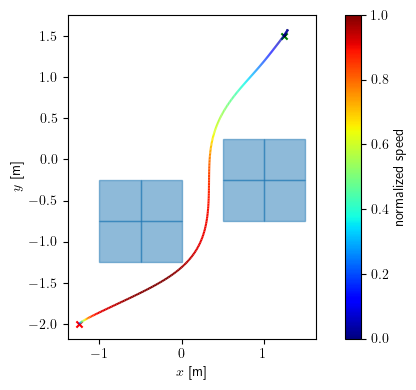

ps_sol_simple2_boundon_conston_angular_rate_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


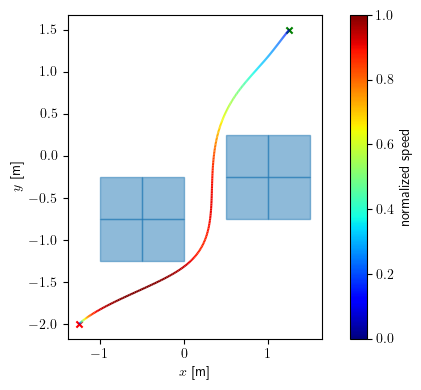

ps_sol_simple2_boundon_conston_angular_rate_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


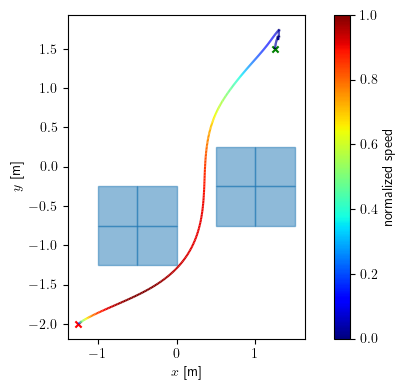

ps_sol_simple2_boundon_conston_angular_rate_ctrlon_isingle_multi_chebyshev_with_warmstart.pkl


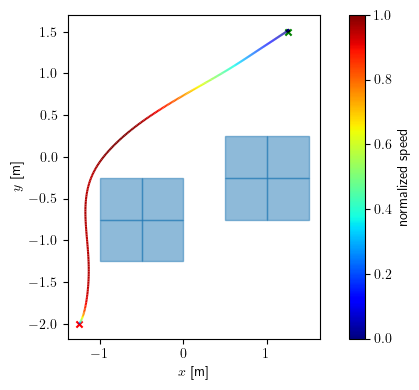

ps_sol_simple2_boundon_conston_angular_rate_ctrlon_isingle_single_chebyshev_with_warmstart.pkl


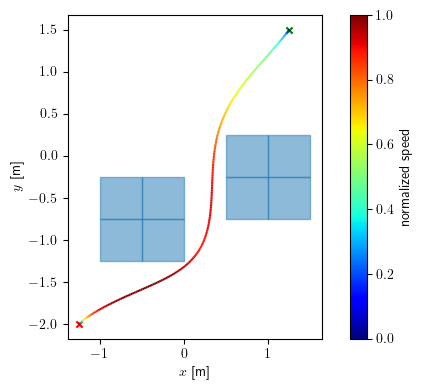

ps_sol_simple2_boundon_conston_angular_rate_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


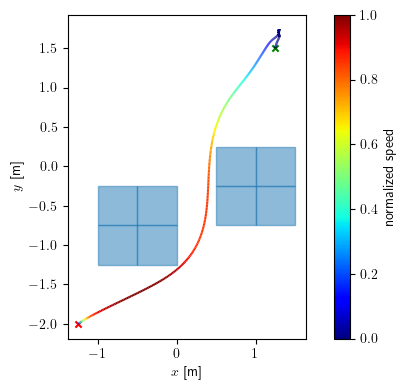

ps_sol_simple2_boundon_conston_angular_rate_ctrlon_imulty_multi_chebyshev_with_warmstart.pkl


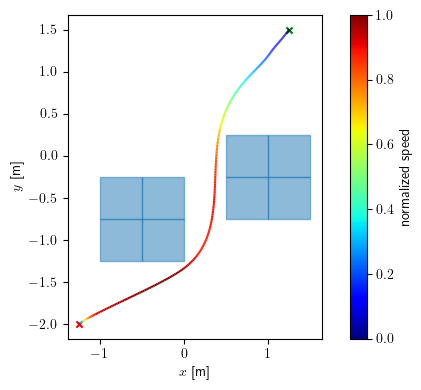

ps_sol_random_columns_boundoff_constoff_none_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


<Figure size 600x400 with 0 Axes>

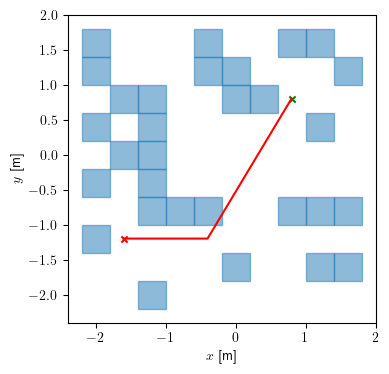

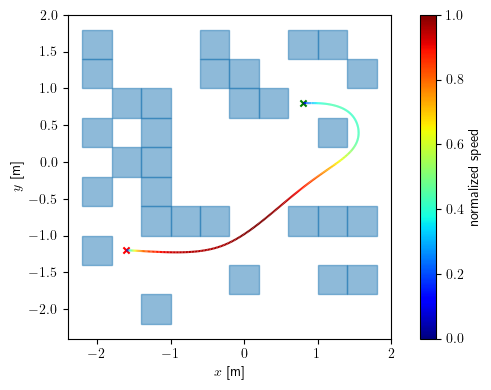

ps_sol_random_columns_boundoff_constoff_none_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


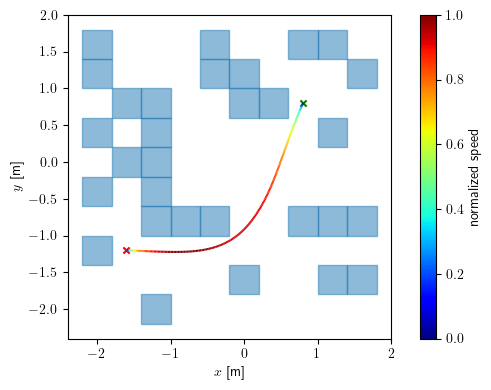

ps_sol_random_columns_boundoff_constoff_none_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


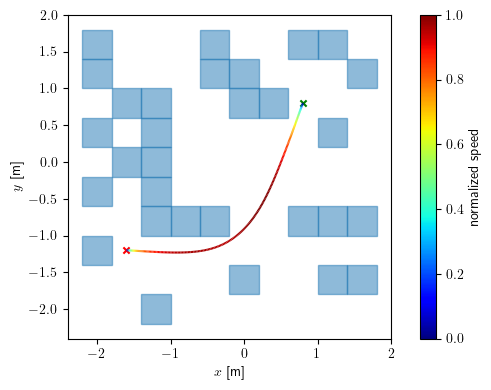

ps_sol_random_columns_boundoff_constoff_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


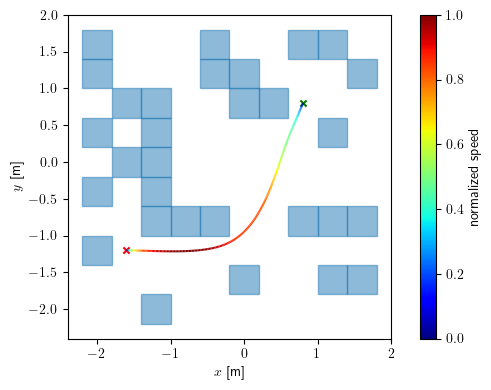

ps_sol_random_columns_boundon_conston_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


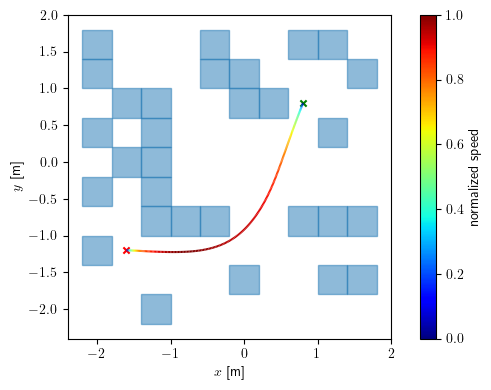

ps_sol_random_columns_boundoff_constoff_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


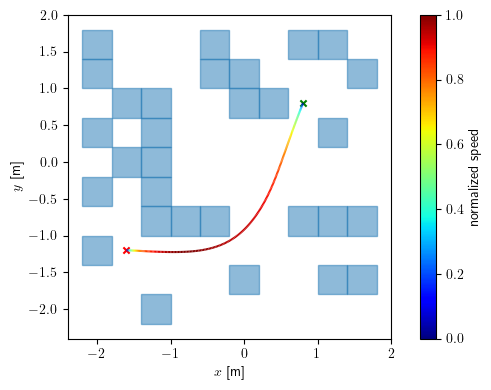

ps_sol_random_columns_boundoff_constoff_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


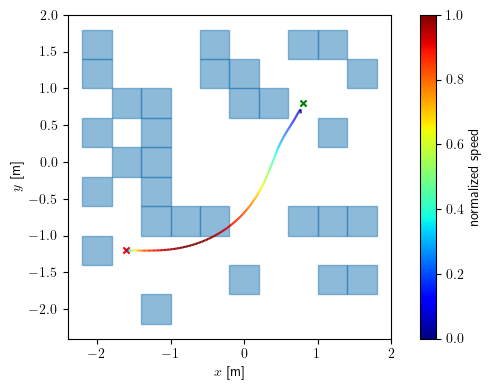

ps_sol_random_columns_boundon_conston_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


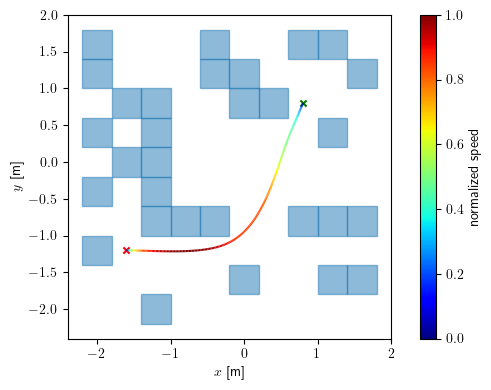

ps_sol_random_columns_boundon_conston_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


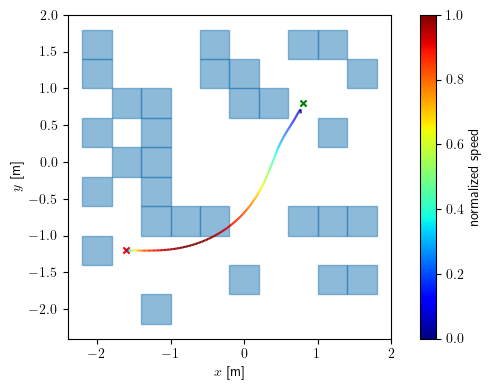

ps_sol_random_columns_boundon_conston_speed_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


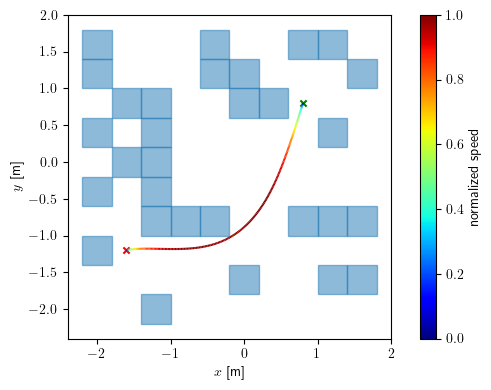

ps_sol_random_columns_boundon_conston_speed_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


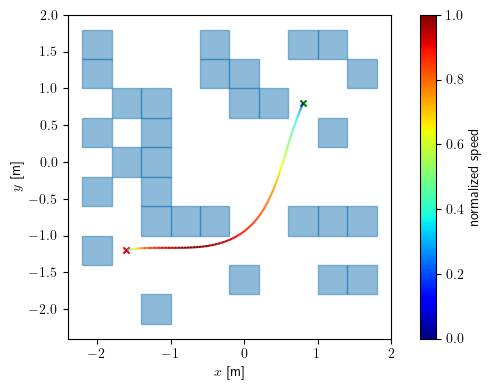

ps_sol_random_columns_boundon_conston_speed_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


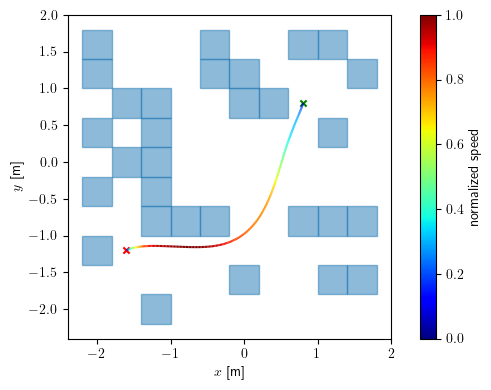

ps_sol_random_columns_boundon_conston_orientation_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


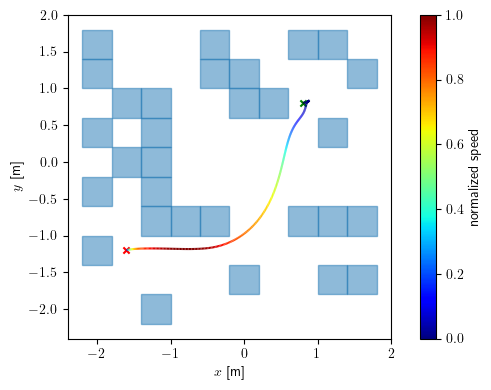

ps_sol_random_columns_boundon_conston_orientation_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


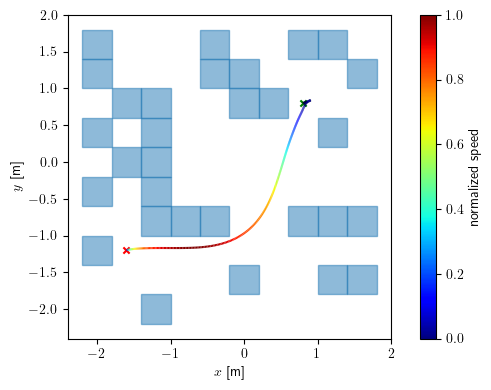

ps_sol_random_columns_boundon_conston_orientation_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


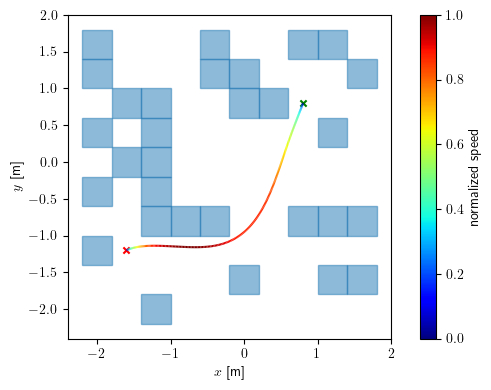

ps_sol_random_columns_boundon_conston_angular_rate_ctrlon_isingle_single_chebyshev_with_warmstart.pkl


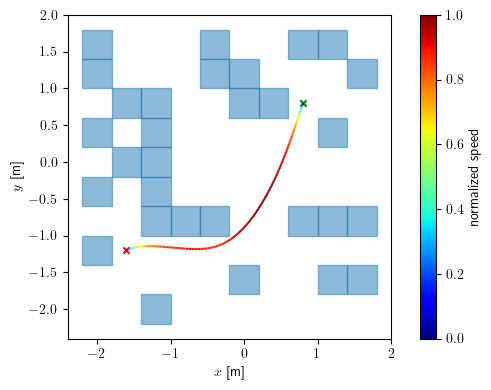

ps_sol_random_columns_boundon_conston_angular_rate_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


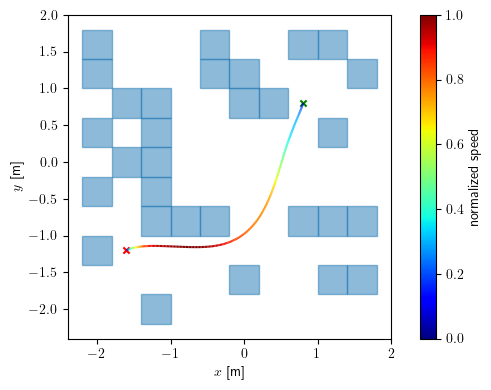

ps_sol_random_columns_boundon_conston_angular_rate_ctrlon_isingle_multi_chebyshev_with_warmstart.pkl


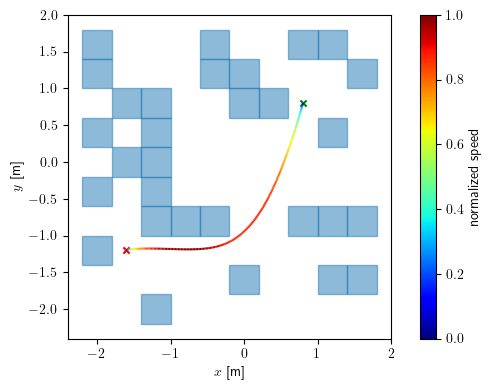

ps_sol_random_columns_boundon_conston_angular_rate_ctrlon_imulty_multi_chebyshev_with_warmstart.pkl


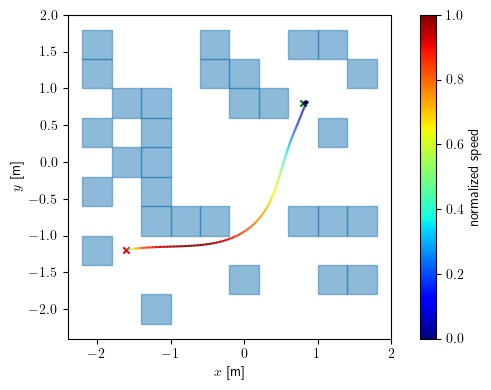

ps_sol_random_columns_boundon_conston_angular_rate_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


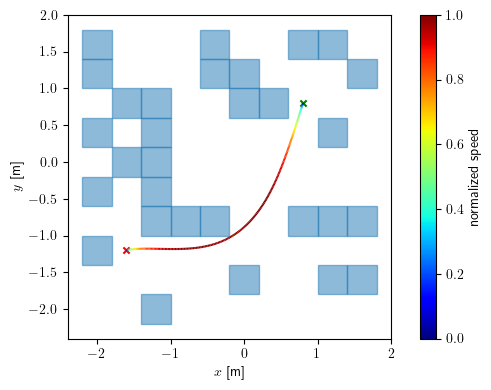

ps_sol_random_columns_boundon_conston_angular_rate_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


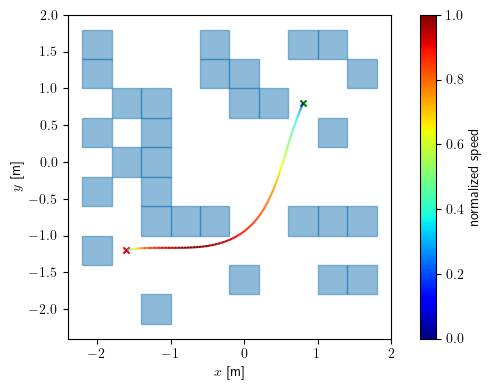

ps_sol_walls_boundoff_constoff_none_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


<Figure size 600x400 with 0 Axes>

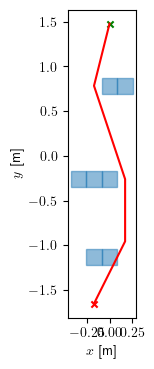

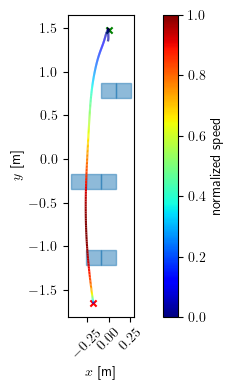

ps_sol_walls_boundoff_constoff_none_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


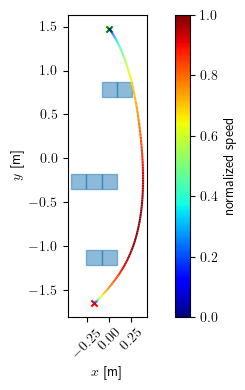

ps_sol_walls_boundoff_constoff_none_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


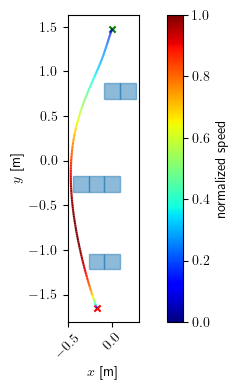

ps_sol_walls_boundon_conston_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


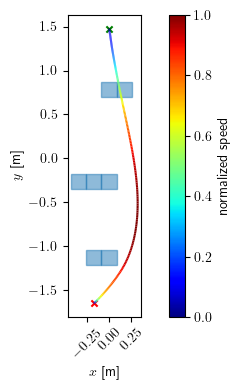

ps_sol_walls_boundoff_constoff_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


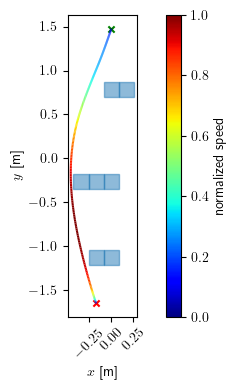

ps_sol_walls_boundoff_constoff_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


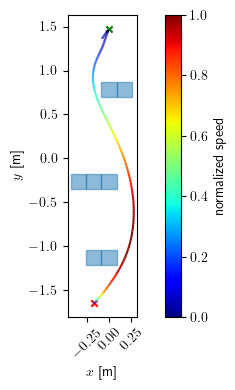

ps_sol_walls_boundon_conston_position_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


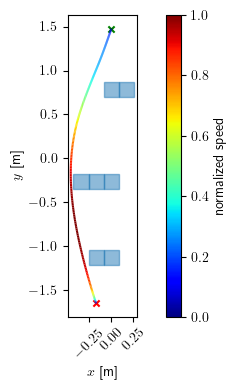

ps_sol_walls_boundon_conston_position_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


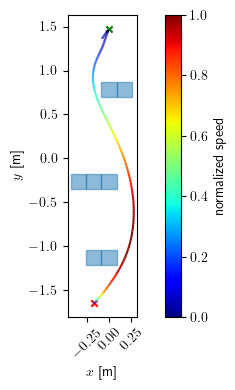

ps_sol_walls_boundoff_constoff_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


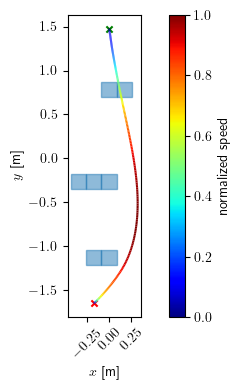

ps_sol_walls_boundon_conston_speed_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


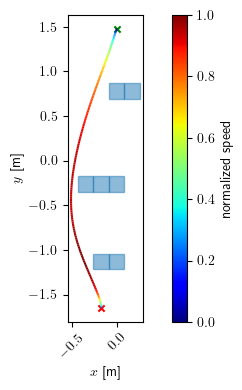

ps_sol_walls_boundoff_constoff_speed_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


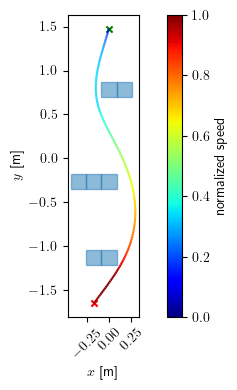

ps_sol_walls_boundon_conston_speed_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


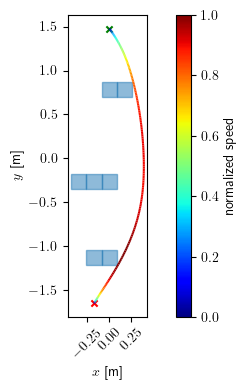

ps_sol_walls_boundon_conston_speed_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


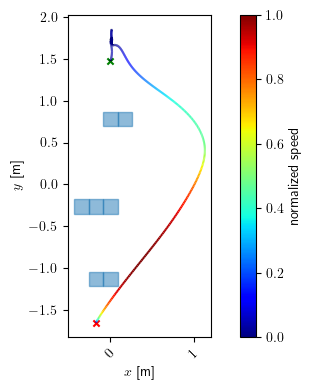

ps_sol_walls_boundoff_constoff_speed_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


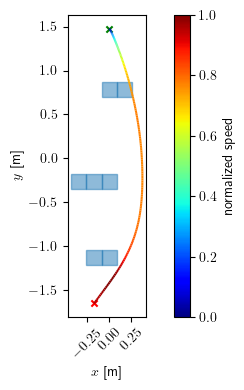

ps_sol_walls_boundoff_constoff_speed_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


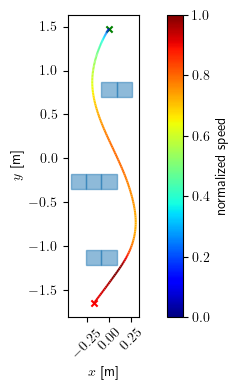

ps_sol_walls_boundoff_constoff_orientation_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


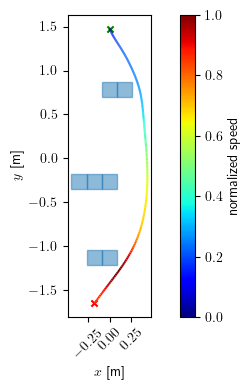

ps_sol_walls_boundoff_constoff_orientation_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


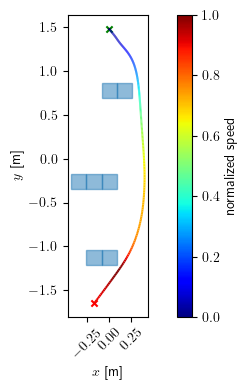

ps_sol_walls_boundon_conston_orientation_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


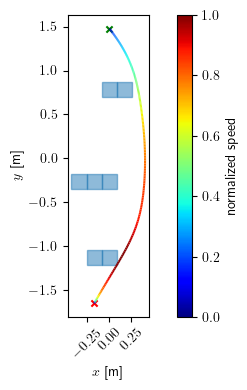

ps_sol_walls_boundon_conston_orientation_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


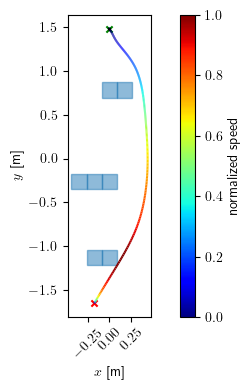

ps_sol_walls_boundon_conston_orientation_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


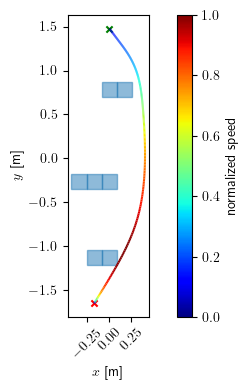

ps_sol_walls_boundoff_constoff_orientation_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


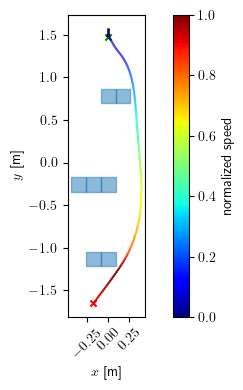

ps_sol_walls_boundon_conston_angular_rate_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


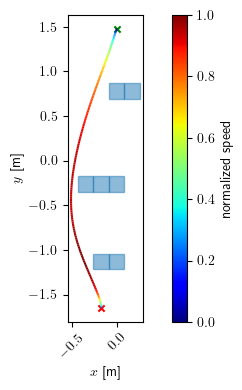

ps_sol_walls_boundoff_constoff_angular_rate_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


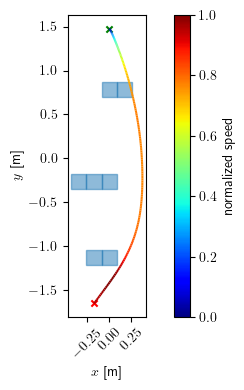

ps_sol_walls_boundoff_constoff_angular_rate_ctrlon_isingle_single_chebyshev_with_warmstart.pkl


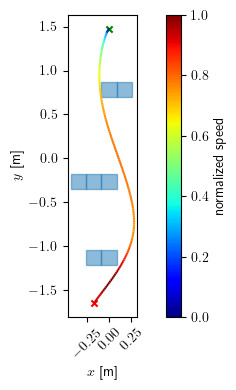

ps_sol_walls_boundoff_constoff_angular_rate_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


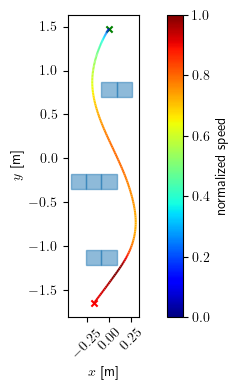

ps_sol_walls_boundoff_constoff_angular_rate_ctrlon_isingle_multi_chebyshev_with_warmstart.pkl


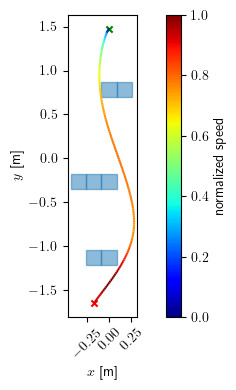

ps_sol_walls_boundoff_constoff_angular_rate_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


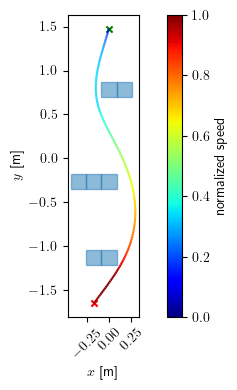

ps_sol_walls_boundon_conston_angular_rate_ctrloff_isingle_single_chebyshev_with_warmstart.pkl


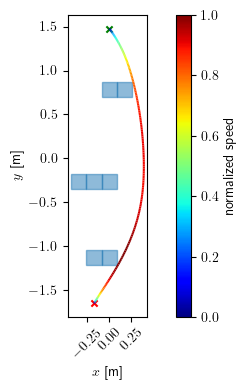

ps_sol_walls_boundoff_constoff_angular_rate_ctrlon_imulty_multi_chebyshev_with_warmstart.pkl


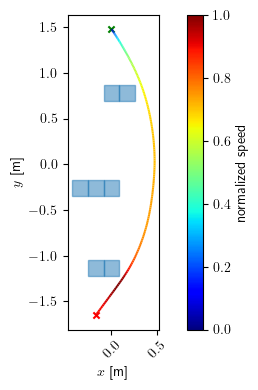

ps_sol_walls_boundon_conston_angular_rate_ctrloff_imulty_multi_chebyshev_with_warmstart.pkl


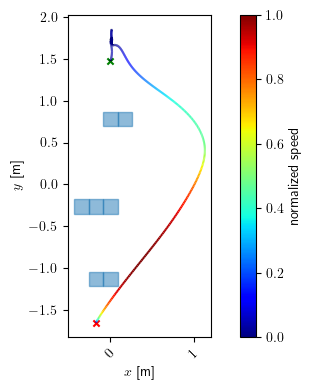

ps_sol_walls_boundon_conston_angular_rate_ctrlon_imulty_multi_chebyshev_with_warmstart.pkl


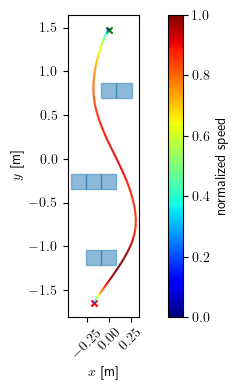

ps_sol_walls_boundon_conston_angular_rate_ctrlon_isingle_multi_chebyshev_with_warmstart.pkl


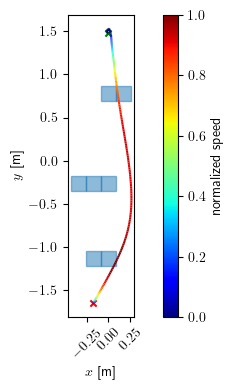

ps_sol_walls_boundon_conston_angular_rate_ctrlon_isingle_single_chebyshev_with_warmstart.pkl


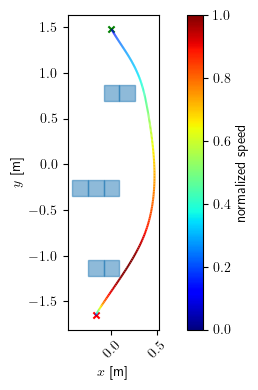

In [8]:
world_name = worlds_results[0] #'simple2'
# bound_val = 'boundon'
drone = Drone()
# plot wolrd with path
for world_name in ['simple','simple2','random_columns','walls']:
    world, path = load_world_path_and_scale(world_name, current_folder = '', drone = drone) 
    condition = (df_traj['name'] == world_name)# & (df_traj['bound'] == bound_val)
    plt.figure(figsize=figsize)
    world.plot()
    if path.shape[1] == 2:
        plt.plot(path[:, 0], path[:, 1], 'r')
    else:
        plt.plot(path[:, 0], path[:, 1], path[:, 2], 'r')
    # plot world for every trajectory
    df_traj['Init. Level'] = pd.Categorical(df_traj['init_level'], categories=init_levels, ordered=True)
    df_traj_filtered = df_traj.loc[condition].sort_values('Init. Level')
    for df_item in df_traj_filtered.iterrows():
        solution_temp = df_item[1]['solution_object']
        print(df_item[1]['filename'])
        time_sampled, state_sampled, control_sampled = solution_temp.get_sampled_trajectory()
        ax = world.plot()
        speed = np.sqrt(state_sampled[3, :]**2 + state_sampled[4, :]**2 + state_sampled[5, :]**2)
        speed_normalized = (speed - speed.min()) / (speed.max() - speed.min())
        cmap = plt.cm.jet
        if path.shape[1] == 2:
            # plt.plot(solution_temp.state[0,:], solution_temp.state[1,:], 'ro-')
            points = np.array([state_sampled[0, :], state_sampled[1, :]]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 1), array=speed_normalized)
            
            ax.add_collection(lc)
            ax.autoscale()
            ax.set_xlabel('$x$ [m]')
            ax.set_ylabel('$y$ [m]')
        else:
            # 3D case
            points = np.array([state_sampled[0, :], state_sampled[1, :], state_sampled[2, :]]).T.reshape(-1, 1, 3)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = Line3DCollection(segments, cmap=cmap, norm=plt.Normalize(0, 1), array=speed_normalized)
            
            # fig = plt.figure()
            # ax.add_collection3d(111, projection='3d')
            ax.add_collection(lc)
            ax.autoscale()
            ax.set_xlabel('$x$ [m]')
            ax.set_ylabel('$y$ [m]')
            ax.set_zlabel('$z$ [m]')
            # plt.plot(solution_temp.state[0,:], solution_temp.state[1,:], solution_temp.state[2,:], 'ro-')
        # Add color bar
        cbar = plt.colorbar(lc, ax=ax)
        cbar.set_label('normalized speed')
        if world_name == 'walls':
            plt.xticks(rotation=45)
        
        if print_plots:
            plt.tight_layout()
            file_plot_name = df_item[1]['filename']
            file_plot_name = file_plot_name.replace('ps_sol_', 'traj_')
            file_plot_name = file_plot_name.replace('.pkl', '.png')
            plt.savefig(os.path.join(full_path_plot, f'{file_plot_name}'), dpi=dpi, bbox_inches="tight")
        plt.show()

ps_sol_random_columns_boundon_conston_position_ctrloff_isingle_multi_chebyshev_with_warmstart.pkl


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


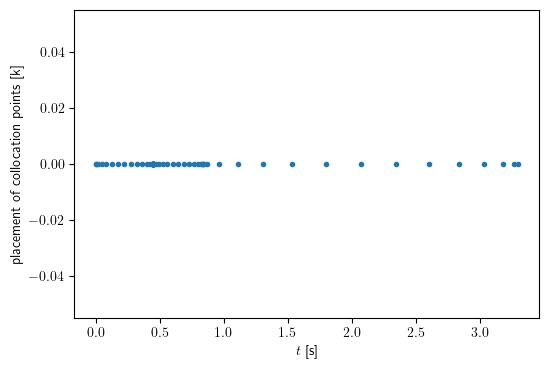

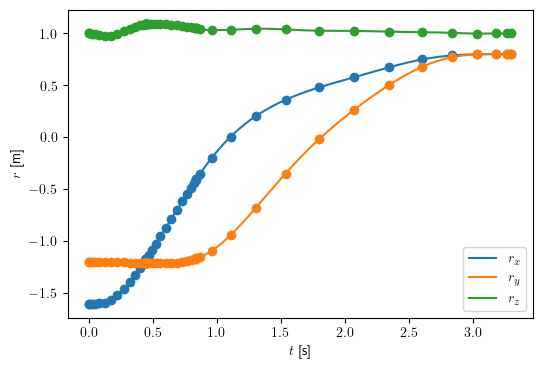

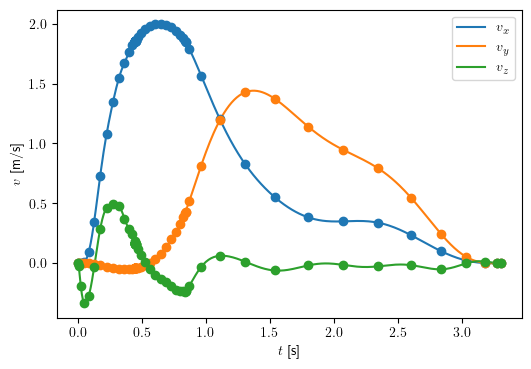

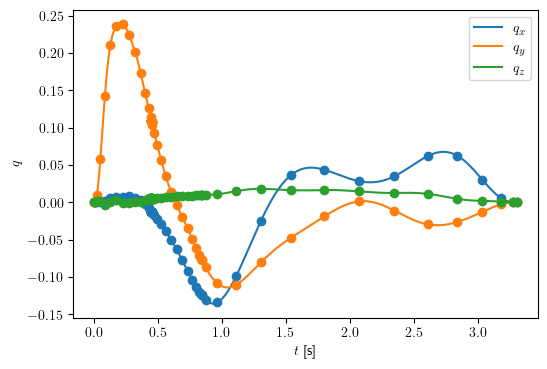

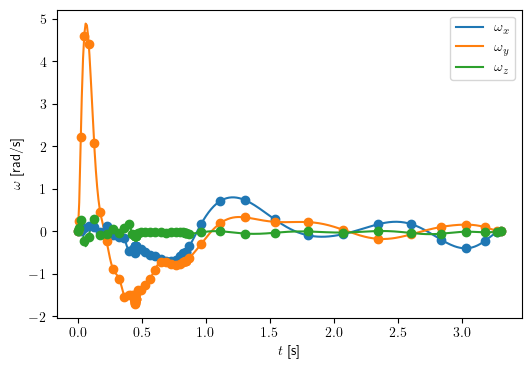

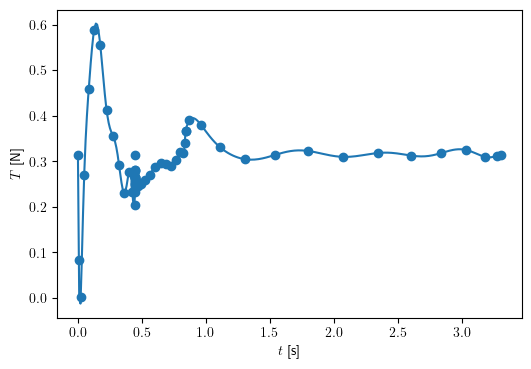

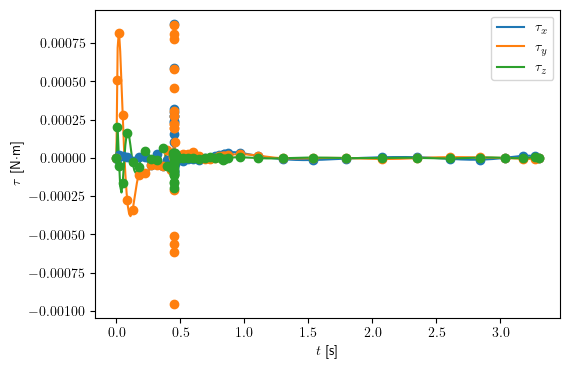

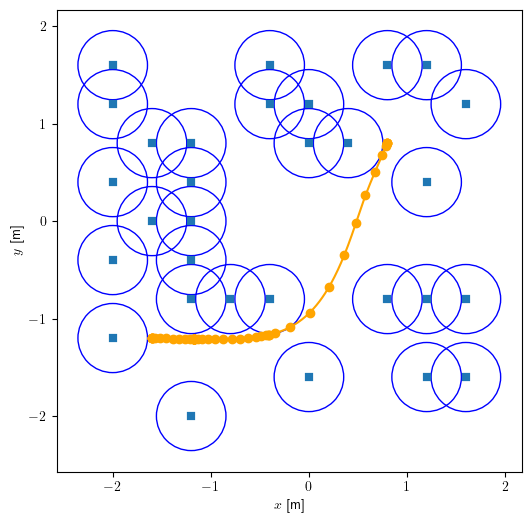

In [9]:
traj_save_path = os.path.join(full_path_plot,'sol_traj_01')+'/'
if print_plots:
    os.makedirs(traj_save_path, exist_ok=True)
# print position single segment boundary multi
condition_sol = (df_traj['name'] == 'random_columns') & (df_traj['const'] == 'conston') & (df_traj['init_level'] == 'position') & (df_traj['init_domain'] == 'isingle') & (df_traj['seg'] == 'multi')
print(df_traj.loc[condition_sol]['filename'].iloc[0])
solution_temp = df_traj.loc[condition_sol].iloc[0]['solution_object']
solution_temp.plot_sampled_with_col(figsize = figsize, save = print_plots, img_folder = traj_save_path)

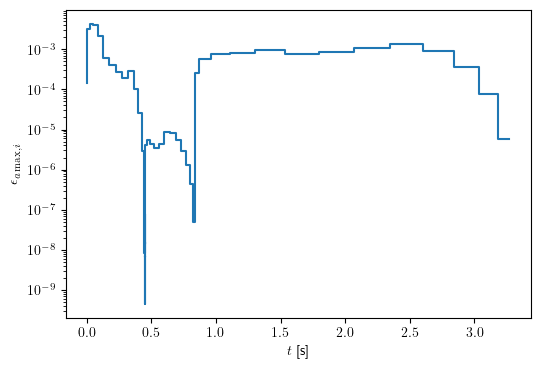

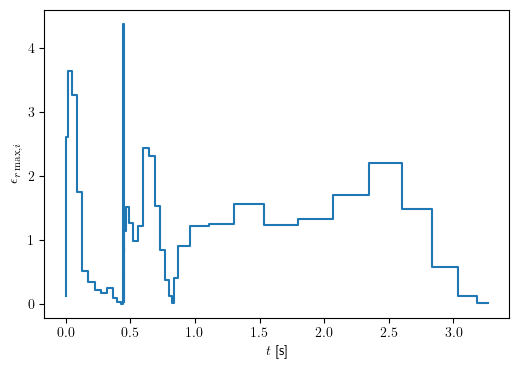

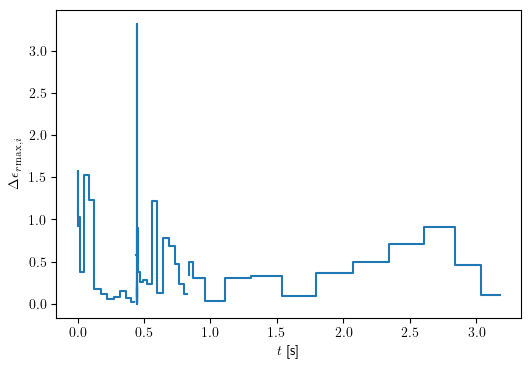

In [10]:
solution_temp.plot_absolute_error(figsize=figsize, save = print_plots, img_folder = traj_save_path)
solution_temp.plot_relative_error_max(figsize=figsize, save = print_plots, img_folder = traj_save_path)
solution_temp.plot_deflection(figsize=figsize, save = print_plots, img_folder = traj_save_path)